# Семинар 2 – Линейные модели

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(palette='deep', style='darkgrid', rc={"figure.figsize": (15, 4)})
import scipy.stats as st

import warnings
warnings.simplefilter('ignore')

Сгенерируем исскуственные данные, на основе функции:
$$f(x) = 4x+5$$

In [2]:
def lin_function(x):
    return 4*x+5

x_true = np.array([-2,2])
y_true = lin_function(x_true)


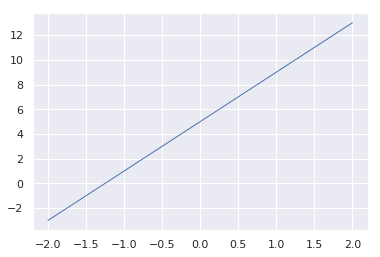

In [3]:
plt.plot(x_true, y_true, linewidth=1)
plt.show()

In [4]:
n = 100
x = np.random.rand(n,1)*4-2
e = np.random.rand(n,1)*4-2
y = lin_function(x) + e


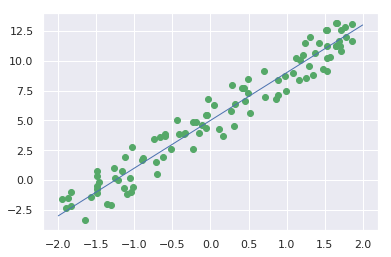

In [5]:
plt.scatter(x, y, color='g')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

# Аналитический метод
$$\hat \theta = \bigl(X^T \cdot X  \bigr)^{-1} \cdot X^T \cdot y $$

In [6]:
x_matrix = np.c_[np.ones((n,1)),x]

In [7]:
%%time
thetha_matrix = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(y)

CPU times: user 2.58 ms, sys: 0 ns, total: 2.58 ms
Wall time: 4.08 ms


In [9]:
thetha_matrix.T[0].tolist()

[5.048297414527212, 3.915261018795715]

In [10]:
print("Свободный член: {[0][0]:.7}".format(thetha_matrix.T))
print("Коэфициент: {[0][1]:.7}".format(thetha_matrix.T))

Свободный член: 5.048297
Коэфициент: 3.915261


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [12]:
%%time
lr = LinearRegression()
lr.fit(x,y)

CPU times: user 19.4 ms, sys: 3.93 ms, total: 23.4 ms
Wall time: 30.9 ms


In [13]:
print("Свободный член: {:.7}".format(lr.intercept_[0]))
print("Коэфициент: {:.7}".format(lr.coef_[0][0]))

Свободный член: 5.048297
Коэфициент: 3.915261


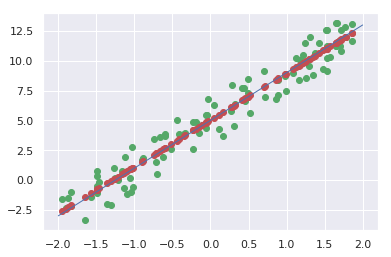

In [14]:
plt.scatter(x, y, color='g')
plt.scatter(x, lr.predict(x), color='r')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

# Пакетный градиентный спуск

$$\nabla MSE(\theta)= \frac{2}{l} X^T \cdot \bigl(X \cdot \theta - y \bigr) $$

### Реализация в numpy

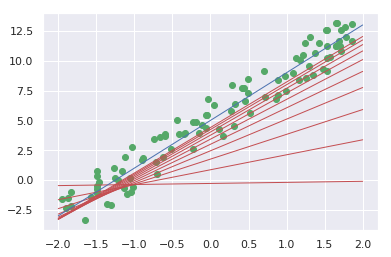

[[5.04829741]
 [3.91526102]]
CPU times: user 395 ms, sys: 7.73 ms, total: 402 ms
Wall time: 398 ms


In [15]:
%%time
eta = 0.1  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta = theta - eta * gradients

plt.plot(x_true, y_true, linewidth=1)
plt.show()

print(theta)

### Слишком маленький шаг обучения (learning rate)

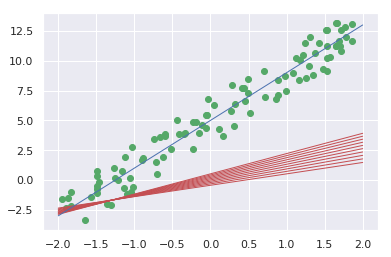

In [16]:
eta = 0.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta = theta - eta * gradients

plt.plot(x_true, y_true, linewidth=1)
plt.show()

### Слишком большой шаг обучения (learning rate)

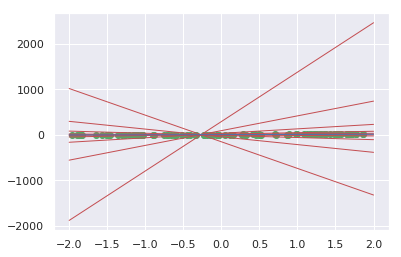

In [17]:
eta = 1.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta = theta - eta * gradients

plt.plot(x_true, y_true, linewidth=1)
plt.show()

# Уменьшение шага на каждой итерации

In [18]:
eta = 1  # learning rate
n_iterations = 1000

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta = theta - (eta/(iteration+1)) * gradients


print(theta)

[[5.0482977 ]
 [3.91526093]]


Learning rate - гипперпараметр, и можно воспользоваться GridSearchCV, однако чтобы не учить каждый раз такое кол-во итераций, мы можем измерять норму градиента, и прекращать спуск, когда он "затух"

In [19]:
eta = 0.1  # learning rate
n_iterations = 1000
tol = 0.00001

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    if np.linalg.norm(gradients) < tol:
        break
    theta = theta - eta * gradients

print('Градиент затух на {} итерации '.format(iteration))
print(theta)

Градиент затух на 63 итерации 
[[5.04829265]
 [3.91526226]]


__Реализация в Scikit-Learn отсутствует__
  
  
# Cтохастический градиентный спуск  

In [24]:
n_epochs = 50

def learning_schedule(t):
    return t0 / (t + t1)

t0, t1 = 5, 100  # learning schedule hyperparameters


theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(n):
        random_index = np.random.randint(n)
        xi = x_matrix[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * n + i)
        theta = theta - eta * gradients
print(theta)

[[5.01513899]
 [3.8993405 ]]


In [25]:
from sklearn.linear_model import SGDRegressor

In [26]:
sgd = SGDRegressor(tol=0.0001)
#The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).
sgd.fit(x,y)
sgd.intercept_, sgd.coef_

(array([5.03818749]), array([3.91656328]))

# Влияние выбора функции потерь
По мотивам [Семинара курса ML на ФИВТ](https://github.com/ml-mipt/ml-mipt/blob/master/week02_linear_reg/week02_linear_regression.ipynb)

In [27]:
with open('../data/data_preprocessed.json') as file:
    X = pd.read_json(file)

In [28]:
X_subset = X[[7, 15]].values
# add two outliers
X_subset_modified = np.vstack((X_subset, [[1, 90], [2, 50]]))

In [29]:
def scatter_points_and_plot_line_MSE(X_subset):
    plt.scatter(X_subset[:, 0], X_subset[:, 1])
    lr = LinearRegression()
    lr.fit(X_subset[:, 0][:, None], X_subset[:, 1])
    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, None])
    plt.plot(grid, line)

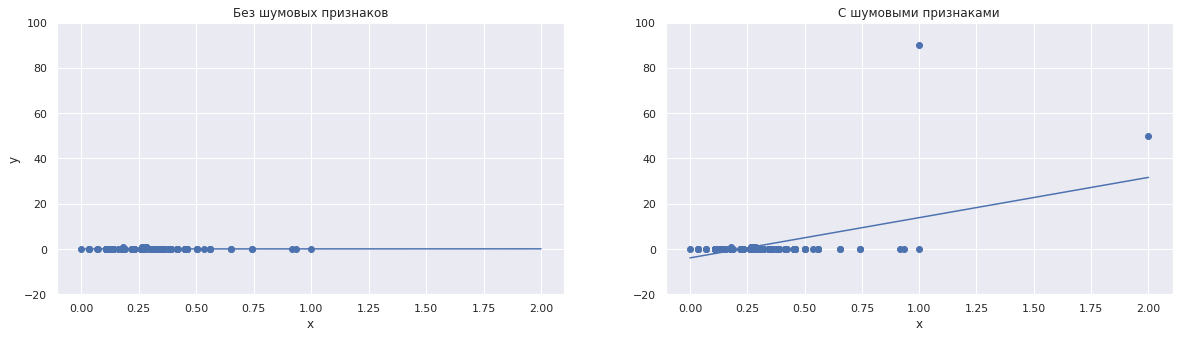

In [30]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.title('Без шумовых признаков')
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.title('С шумовыми признаками')
plt.show()

Из-за шумовых объектов прямая достаточно сильно изменила наклон. Поэтому вместо MSE часто используют Mean Absoulte Error: $$L(y_i, a(x_i)) = |y_i - a(x_i)|$$
Теперь обучим регрессию, оптимизируя MAE. В sklearn такая регрессия не реализована, но можно использовать модуль statsmodels

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [34]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0,0,0,0,0,0,0,1,0,0
10,0.8,0.664921,0.425656,0.532836,0.375000,0.541667,0.351823,0.177358,0.685714,0.347619,...,0,0,0,0,0,0,0,1,0,0
100,0.4,0.214660,0.309038,0.482090,0.408333,0.575000,0.315749,0.222642,0.564286,0.666667,...,0,0,0,1,0,0,0,0,0,0
101,0.4,0.329843,0.402332,0.605970,0.516667,0.608333,0.623351,0.452830,0.635714,0.571429,...,0,0,0,0,0,0,0,1,0,0


In [35]:
def scatter_points_and_plot_line_MAE(X_subset):
    mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset, columns=["f7", "f15"])) # задаеем зависимость и передаем данные
    res = mod.fit(q=0.5)
    plt.scatter(X_subset[:, 0], X_subset[:, 1])   # визуализируем точки
    grid = np.linspace(0, 2, 100)
    plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
    return mod, res

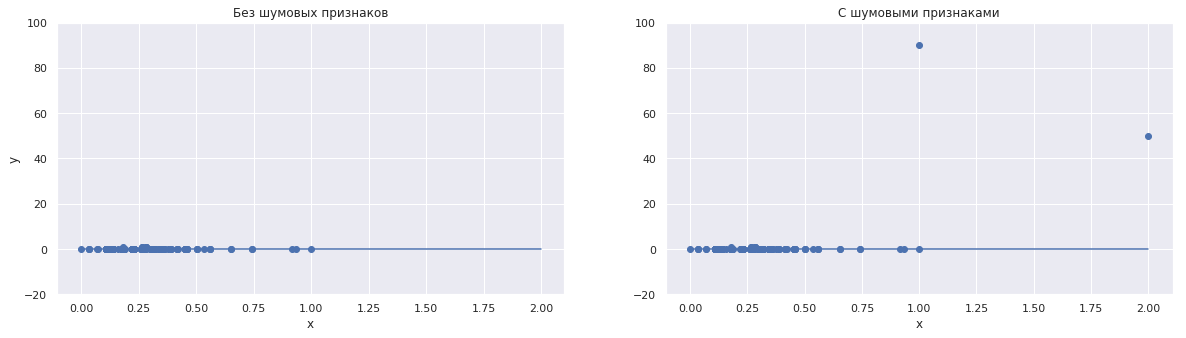

In [36]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('Без шумовых признаков')
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
plt.title('С шумовыми признаками')
model, result = scatter_points_and_plot_line_MAE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.show()

Прямая не изменила направление из-за выбросов.
Попробуем добавить больше шумовых объектов:

In [37]:
X_subset_modified_twice = np.vstack((
    X_subset_modified, 
    np.random.randint(5, size=60).reshape(-1, 2) * [1, 30],
))

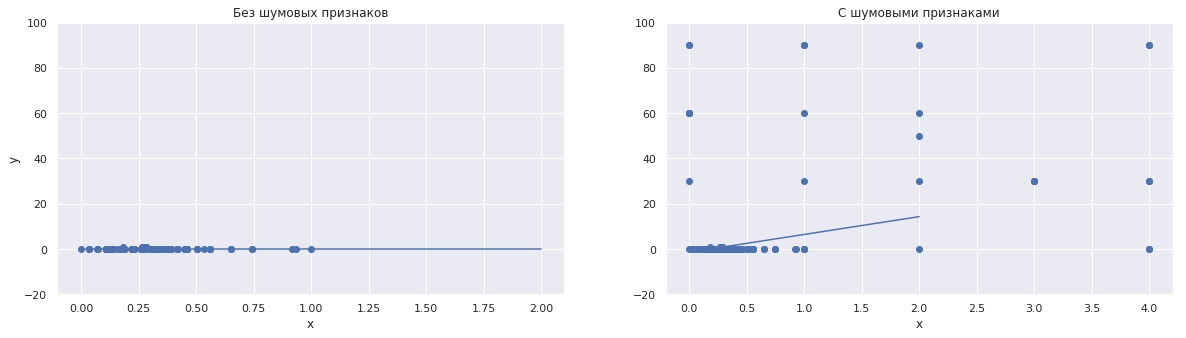

In [38]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.title('Без шумовых признаков')
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_modified_twice)
plt.title('С шумовыми признаками')
plt.ylim(-20, 100)
plt.xlabel("x")
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

Для примера решения задачи прогнозирования, я взял набор данных Energy efficiency из крупнейшего репозитория UCI.   

В нем $X_1 ... X_8$ — характеристики помещения на основании которых будет проводиться анализ, а $y_1,y_2$ — значения нагрузки, которые надо спрогнозировать.
- $X_1$	Относительная компактность
- $X_2$	Площадь
- $X_3$	Площадь стен
- $X_4$	Площадь потолка	
- $X_5$	Общая высота	
- $X_6$	Ориентация
- $X_7$	Площадь остекления	
- $X_8$	Распределенная площадь остекления	
- $y_1$	Нагрузка при обогреве
- $y_2$	Нагрузка при охлаждении

In [40]:
data = pd.read_csv('../data/energy_efficiency.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Рассмотрим Матрицу корреляции

In [41]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


Увеличим читаемость:

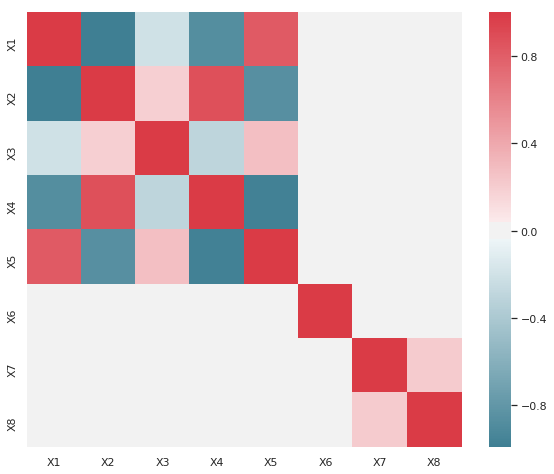

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.drop(['Y1','Y2'], axis=1).corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

In [43]:
X = data.drop(['Y1','Y2'], axis=1)
y = data['Y1']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
def my_linear_regression(X_train, Y_train):
    return np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

def predict(X, w):
    return np.dot(X, w)

In [46]:
w = my_linear_regression(X_train, y_train)
print(w)
y_train_pred = predict(X_train, w)
print('='*10, 'Train', '='*10)
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("R2: ", r2_score(y_train, y_train_pred))
y_test_pred = predict(X_test, w)
print('='*10, 'Test', '='*10)
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("R2: ", r2_score(y_test, y_test_pred))

[-3.23201828e+03 -1.48549282e+00  3.16272630e+00  5.58775652e+00
  5.19332015e+00 -1.88343056e-02  2.02690488e+01  2.17983647e-01]
========== Train ==========
MSE:  2318208.9730364135
R2:  -22968.868292978248
========== Test ==========
MSE:  2482226.0615332327
R2:  -23813.340267445197


Удалим скоррелированные признаки

In [61]:
X_droped = data.drop(['X1','X4', 'Y1','Y2'], axis=1)
y = data['Y1']
X_train_new, X_test_new, y_train, y_test = train_test_split(X_droped, y, test_size=0.2, random_state=42)

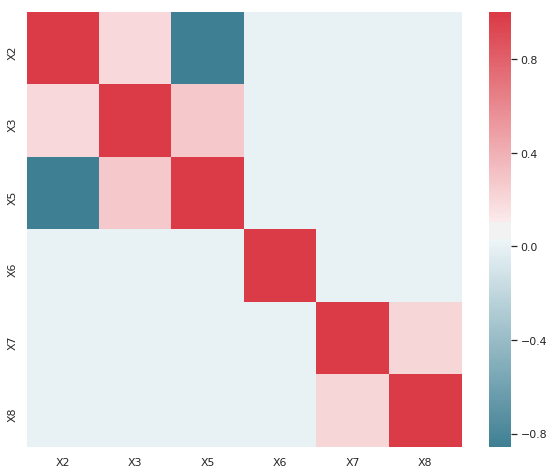

In [63]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_droped.corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

In [64]:
w = my_linear_regression(X_train_new, y_train)
print(w)
y_train_pred = predict(X_train_new, w)
print('='*10, 'Train', '='*10)
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("R2: ", r2_score(y_train, y_train_pred))
y_test_pred = predict(X_test_new, w)
print('='*10, 'Test', '='*10)
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("R2: ", r2_score(y_test, y_test_pred))

[-0.03500315  0.07983498  2.99880727 -0.14883542 19.95687419  0.17397881]
========== Train ==========
MSE:  9.851958700759099
R2:  0.9023823147885197
========== Test ==========
MSE:  11.387213360639421
R2:  0.8907517015187721


Применим регуляризацию:

In [67]:
def my_linear_regression(X_train, Y_train, l2=0):
    return np.linalg.inv(X_train.T.dot(X_train) + l2*np.eye(X_train.shape[1])).dot(X_train.T).dot(y_train)

In [73]:
w = my_linear_regression(X_train, y_train, 1)
print(w)
y_train_pred = predict(X_train, w)
print('='*10, 'Train', '='*10)
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("R2: ", r2_score(y_train, y_train_pred))
y_test_pred = predict(X_test, w)
print('='*10, 'Test', '='*10)
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("R2: ", r2_score(y_test, y_test_pred))

[-1.28794637e+01 -7.86832024e-03  4.25892708e-02 -2.52287964e-02
  4.47560226e+00 -5.41474090e-02  1.84265870e+01  2.35097345e-01]
========== Train ==========
MSE:  8.764545067712783
R2:  0.9131569033703018
========== Test ==========
MSE:  9.718840410930687
R2:  0.9067579798078751


# Посмотрим, как внутри sklearn

In [74]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print(linear_model.coef_)
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

print('='*10, 'Train', '='*10)
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("R2: ", r2_score(y_train, y_train_pred))
y_test_pred = predict(X_test, w)
print('='*10, 'Test', '='*10)
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("R2: ", r2_score(y_test, y_test_pred))

[-6.17367779e+01  3.36859713e+11 -3.36859713e+11 -6.73719427e+11
  4.12182875e+00 -3.27529490e-02  2.01421899e+01  2.11214747e-01]
========== Train ==========
MSE:  8.360816354286598
R2:  0.9171572309858689
========== Test ==========
MSE:  9.718840410930687
R2:  0.9067579798078751


In [75]:
linear_model = Ridge() ## L2 регуляризация
linear_model.fit(X_train, y_train)
print(linear_model.coef_)
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

print('='*10, 'Train', '='*10)
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("R2: ", r2_score(y_train, y_train_pred))
y_test_pred = predict(X_test, w)
print('='*10, 'Test', '='*10)
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("R2: ", r2_score(y_test, y_test_pred))

[-3.91829946e+00  1.20188728e-02  3.55461685e-02 -1.17636472e-02
  5.28628112e+00 -2.13048724e-02  1.85256371e+01  2.47093661e-01]
========== Train ==========
MSE:  8.778762683624313
R2:  0.9130160287689494
========== Test ==========
MSE:  9.718840410930687
R2:  0.9067579798078751


In [76]:
linear_model = Lasso() ## L1 регуляризация 
linear_model.fit(X_train, y_train)
print(linear_model.coef_)
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

print('='*10, 'Train', '='*10)
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("R2: ", r2_score(y_train, y_train_pred))
y_test_pred = predict(X_test, w)
print('='*10, 'Test', '='*10)
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("R2: ", r2_score(y_test, y_test_pred))

[-0.         -0.07739549  0.12650197 -0.02448017  0.         -0.
  0.          0.14163133]
========== Train ==========
MSE:  21.151462833847667
R2:  0.7904216914228664
========== Test ==========
MSE:  9.718840410930687
R2:  0.9067579798078751
